# Задание:
1. Загрузить датасет WINE.
2. Подготовить выборки: обучающую 70% и тестовую 30%.
3. Построить указанные в задании классификаторы.
4. Применить указанные классификаторы к каждой паре из указанных в варианте задания признаков.
5. Построить разделяющие границы для каждого классификатора и каждой пары признаков.
6. Выбрать наилучшую комбинацию пару признаков и классификатора.
7. Сделать вывод.
8. Все результаты классификации и вывод записать в качестве ответа в текстовое поле. В качестве ответа также разместить ipynb файл. 

**Классификатор 1 - К-ближайших соседей (К=3), Классификатор 2 - Байес; Признаки: magnesium , flavanoids , proanthocyanins**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
wine = load_wine(as_frame=True)
wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [3]:
cm=plt.cm.RdBu
cm_bright=ListedColormap(['#FF0000', "#0000FF"])
cmap_light=ListedColormap(['blue', "orange", 'green'])
cmap_bold=ListedColormap(['darkblue', "darkorange", 'darkgreen'])

In [8]:

def classification(wine, x_label, y_label, names, classifiers ):
    X=wine.frame[[x_label, y_label]]
    y = wine.frame['target']

    scaler = preprocessing.MinMaxScaler()
    scaled_features = scaler.fit_transform(X)
    X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123) 
    
    h = .01  # step size in the mesh
    x_min, x_max = X.min()[x_label] - 0.1, X.max()[x_label] + 0.1
    y_min, y_max = X.min()[y_label] - 0.1, X.max()[y_label] + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    fig = plt.figure(figsize=(14,10))

    # Draw dataset
    ax = plt.subplot(2, 2, 1)

    # Plot the training points
    ax.scatter(x=X_train[x_label], y=X_train[y_label], c=y_train, cmap=cmap_bold, alpha=1.0, edgecolor="black")
    ax.scatter(x=X_test[x_label], y=X_test[y_label], c=y_test, cmap=cmap_light, alpha=0.6, edgecolor="black")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"Wine: {x_label}, {y_label}")

    # iterate over classifiers
    i = 3
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(2, 2, i)
        clf.fit(X_train.values, y_train)
                
        # Prediction for test data
        y_pred = clf.predict(X_test.values)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy of {name} for [{x_label}, {y_label}]: {accuracy:.2f}")

        # Prediction for visualization
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=.8)
    
        # Plot the training points
        ax.scatter(x=X_train[x_label], y=X_train[y_label], c=y_train, cmap=cmap_bold, alpha=1.0, edgecolor="black")
        ax.scatter(x=X_test[x_label], y=X_test[y_label], c=y_test, cmap=cmap_light, alpha=0.6, edgecolor="black")
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_title(name)
        i += 1
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    plt.show()

Accuracy of KNeighbors for [magnesium, flavanoids]: 0.87
Accuracy of Naive Bayes for [magnesium, flavanoids]: 0.85


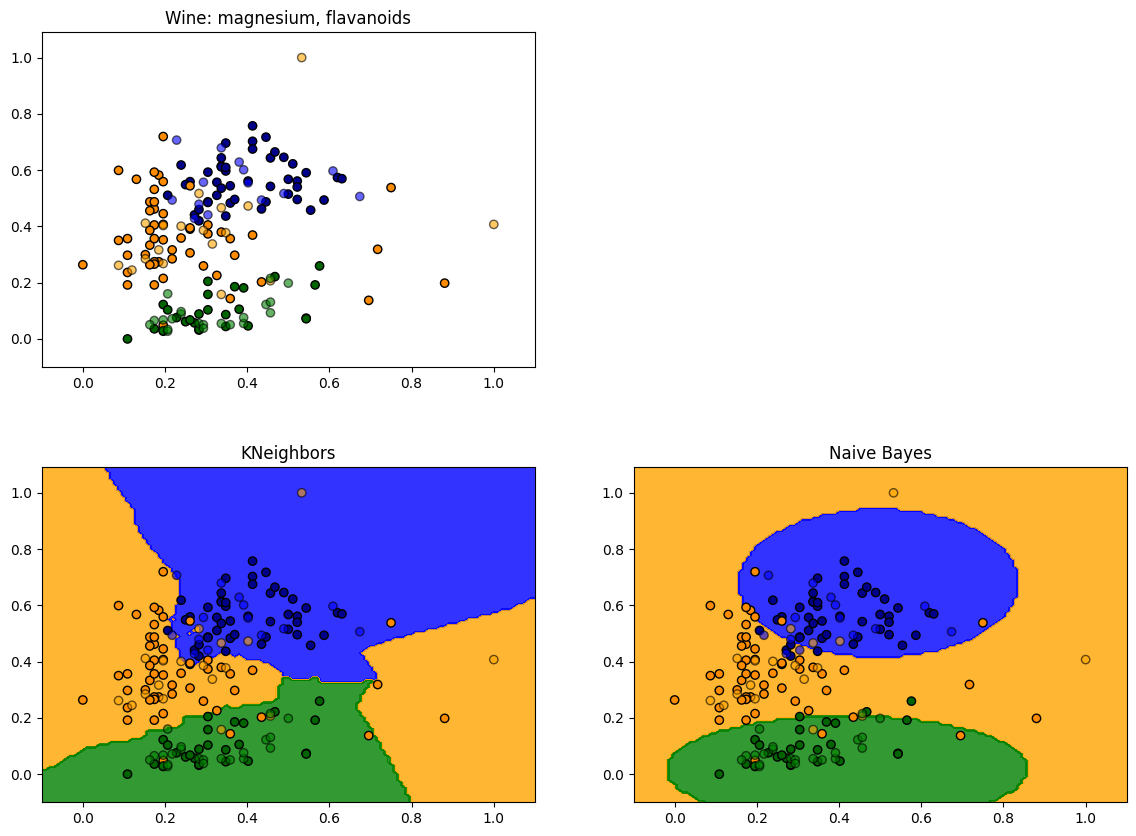

In [10]:

classification(wine=wine,
                x_label='magnesium', y_label='flavanoids',
                  names=[ "KNeighbors", "Naive Bayes" ],
                    classifiers=[KNeighborsClassifier(n_neighbors =  3), GaussianNB()])

Accuracy of KNeighbors for [magnesium, proanthocyanins]: 0.59
Accuracy of Naive Bayes for [magnesium, proanthocyanins]: 0.59


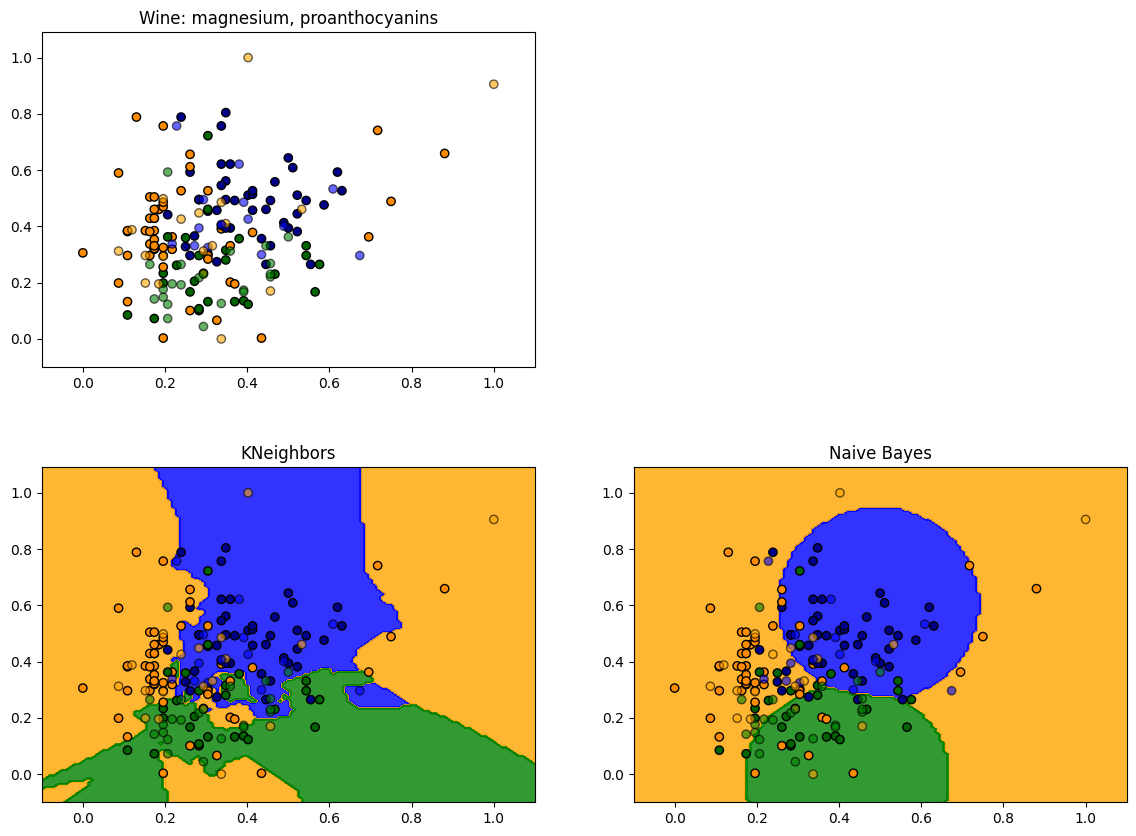

In [12]:
classification(wine,
                x_label='magnesium', y_label='proanthocyanins',
                  names=[ "KNeighbors", "Naive Bayes" ],
                    classifiers=[KNeighborsClassifier(n_neighbors =  3), GaussianNB()])

Accuracy of KNeighbors for [flavanoids, proanthocyanins]: 0.87
Accuracy of Naive Bayes for [flavanoids, proanthocyanins]: 0.81


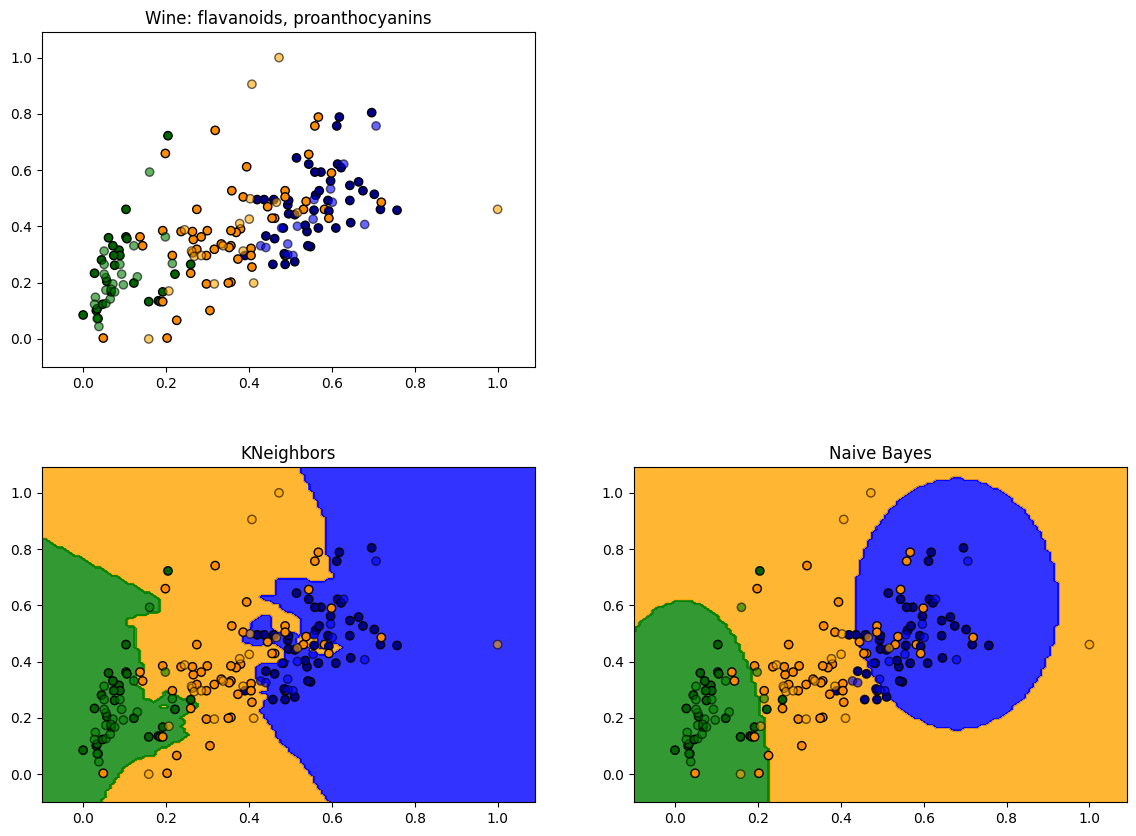

In [13]:
classification(wine=wine,
                x_label='flavanoids', y_label='proanthocyanins',
                  names=[ "KNeighbors", "Naive Bayes" ],
                    classifiers=[KNeighborsClassifier(n_neighbors =  3), GaussianNB()])

**Метрика accuracy показала, что лучашя точность была достигнута с помощью классификатора KNeighbors**      
**Для пар парамтетров magnesium, flavanoids и flavanoids, proanthocyanins и равна 0.87**